In [17]:
from scipy import optimize
import pennylane as qml
from pennylane import numpy as np
from scipy.optimize import newton
from scipy.sparse.linalg import lsmr
from numdifftools import Jacobian
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize



In [18]:
#A = np.array([[-2, 1, 0, 0], [1, -2, 1, 0], [0, 1, -2, 1], [0, 0, 1, -2]])
A=np.array([[-2/np.sqrt(5), 1/np.sqrt(5), 0., 0.],
[1/np.sqrt(6),  -2/np.sqrt(6), 1/np.sqrt(6),  0.],
[0., 1/np.sqrt(6),  -2/np.sqrt(6), 1/np.sqrt(6)],
[0.,          0. ,        1/np.sqrt(5),  -2/np.sqrt(5)]])

print(A)
b = np.array([0.5, 0.5, 0.5, 0.5])

[[-0.89442719  0.4472136   0.          0.        ]
 [ 0.40824829 -0.81649658  0.40824829  0.        ]
 [ 0.          0.40824829 -0.81649658  0.40824829]
 [ 0.          0.          0.4472136  -0.89442719]]


In [19]:
dev = qml.device('lightning.qubit', wires=5)


#@qml.qnode(dev1)
def statepreparation(X):
    
    qml.templates.MottonenStatePreparation(X, wires=[3, 4])
    
    #return qml.state()
    
 
    

#print(stateper(A[0]))
state_p = qml.ctrl(statepreparation, control=[1, 2])

In [20]:
#dev = qml.device('lightning.qubit', wires=5)
#@qml.qnode(dev)
def Matrix_encod(X):
    
    qml.Hadamard(wires=1)
    qml.ctrl(qml.Hadamard, control=1)(wires=2)
    state_p(X[0])
    ######################
    qml.CNOT(wires=[1, 2])
    state_p(X[1])
    ##################
    qml.PauliX(wires=1)
    qml.ctrl(qml.Hadamard, control=1)(wires=2)
    state_p(X[2])
    #######################################
    qml.CNOT(wires=[1, 2])
    state_p(X[3])
    
    return qml.state()
    

In [21]:
#print(Matrix_encod(A))

In [22]:
Matrix_cont = qml.ctrl(Matrix_encod, control=0)
stateb = qml.ctrl(statepreparation, control=0)

In [23]:
@qml.qnode(dev)
def Matrix_Vector_m(X, b):
    
    qml.Hadamard(wires=[0])
    Matrix_cont(X)
    qml.PauliX(wires=[0])
    qml.ctrl(qml.Hadamard, control=0)(wires=1)
    qml.ctrl(qml.Hadamard, control=0)(wires=2)
    stateb(b)
    qml.PauliX(wires=[0])
    qml.Hadamard(wires=[0])
    
    #return qml.state()
    return qml.probs(wires=[0,1,2])
    
    #return [qml.expval(qml.PauliZ(i)) for i in range(5)]
    

(<Figure size 792x432 with 1 Axes>, <matplotlib.axes._axes.Axes object at 0x7f06837e5d90>)


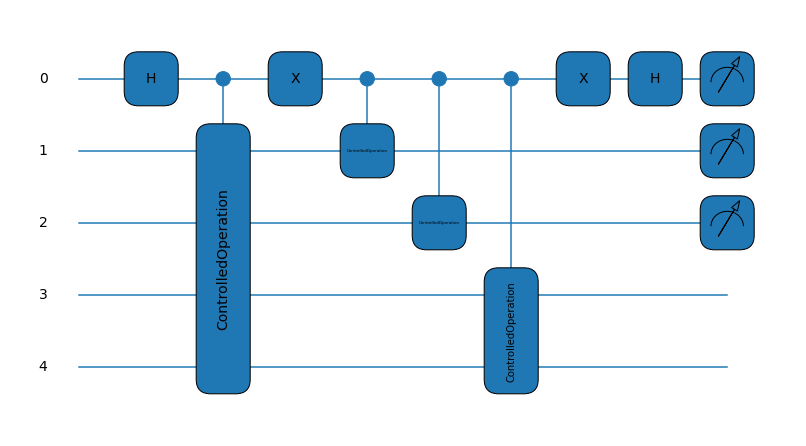

In [24]:
print(qml.draw_mpl(Matrix_Vector_m)(A, b))

In [25]:
results = Matrix_Vector_m(A, b)
print(8*results-1)

[-1.58113883e-01 -3.10862447e-15 -4.55191440e-15 -1.58113883e-01
  1.58113883e-01 -7.54951657e-15 -3.33066907e-15  1.58113883e-01]


In [26]:
B=np.array([[-2/np.sqrt(5), 1/np.sqrt(5), 0., 0.],
[1/np.sqrt(6),  -2/np.sqrt(6), 1/np.sqrt(6),  0.],
[0., 1/np.sqrt(6),  -2/np.sqrt(6), 1/np.sqrt(6)],
[0.,          0. ,        1/np.sqrt(5),  -2/np.sqrt(5)]])

In [27]:
print(np.matmul(B, b))

[-0.2236068  0.         0.        -0.2236068]
